Assignment- 2. Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (MNIST/CIFAR10)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy

In [1]:
# a Importing Necessary packages
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [2]:
'''# b Load the training and testing data (MNIST)
mnist = tf.keras.datasets.mnist'''

'# b Load the training and testing data (MNIST)\nmnist = tf.keras.datasets.mnist'

In [3]:
'''# splitting it into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()'''


# Load the CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Split features and labels
x_train = train_data.iloc[:, 1:].values  # All columns except the first one
y_train = train_data.iloc[:, 0].values   # First column as labels

x_test = test_data.iloc[:, 1:].values    # All columns except the first one
y_test = test_data.iloc[:, 0].values     # First column as labels

In [4]:



# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to match model input
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)




'''# Normalising or scalling data
x_train = x_train / 255
x_test = x_test / 255'''


'# Normalising or scalling data\nx_train = x_train / 255\nx_test = x_test / 255'

In [7]:
# c Define the network architecture using keras

model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# d train the model using SGD

model.compile(optimizer = 'sgd',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.7234 - loss: 1.0563 - val_accuracy: 0.9029 - val_loss: 0.3587
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.9027 - loss: 0.3543 - val_accuracy: 0.9177 - val_loss: 0.2957
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9181 - loss: 0.2968 - val_accuracy: 0.9272 - val_loss: 0.2614
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.9266 - loss: 0.2644 - val_accuracy: 0.9316 - val_loss: 0.2431
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9347 - loss: 0.2396 - val_accuracy: 0.9385 - val_loss: 0.2176
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - accuracy: 0.9394 - loss: 0.2189 - val_accuracy: 0.9429 - val_loss: 0.2036
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9442 - loss: 0.2006 - val_accuracy: 0.9456 - val_loss: 0.1914
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9507 -

In [9]:
# e Evaluuate the network

test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.9460 - loss: 0.1887
loss=0.163
Accuracy=0.953


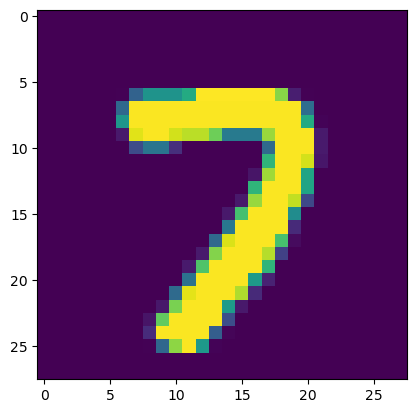

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


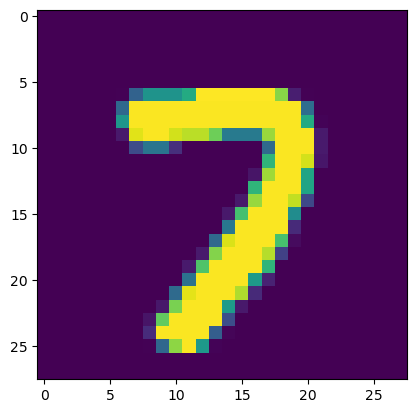

In [10]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [11]:
print('predicted value: ', predicted_value[n])

predicted value:  [8.7877906e-06 3.7723072e-10 1.2555134e-03 4.6962197e-03 4.2095856e-08
 3.5005023e-06 7.2617738e-11 9.9381447e-01 5.5334967e-06 2.1585352e-04]


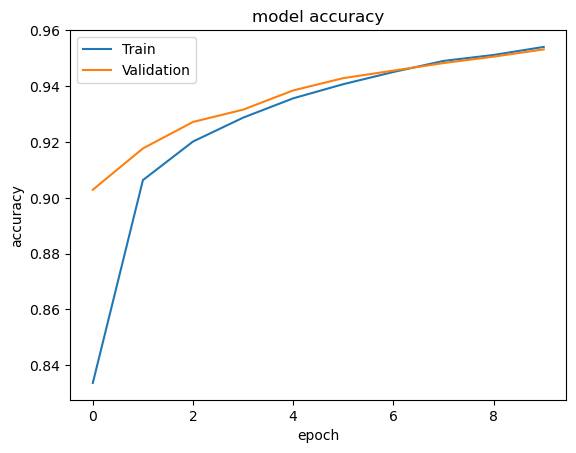

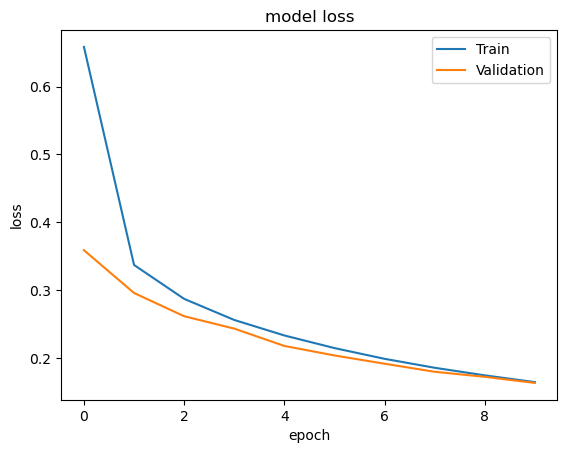

In [12]:
# f plot the training loss and accuracy

# plotting the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plotting the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [13]:
print(np.argmax(predicted_value[n], axis=0))

7


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features and labels
x_train = train_data.iloc[:, 1:].values  # Pixel data (all columns except the first)
y_train = train_data.iloc[:, 0].values   # Labels (first column)

x_test = test_data.iloc[:, 1:].values    # Pixel data (all columns except the first)
y_test = test_data.iloc[:, 0].values     # Labels (first column)

# Reshape x_train and x_test to fit the model requirements (28x28 pixels)
x_train = x_train.reshape(-1, 28, 28).astype('float32') / 255  # Normalize to [0,1]
x_test = x_test.reshape(-1, 28, 28).astype('float32') / 255    # Normalize to [0,1]

# If needed, convert y_train and y_test to categorical (one-hot encoded) format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

# Load the CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Split features and labels
x_train = train_data.iloc[:, 1:].values  # All columns except the first one
y_train = train_data.iloc[:, 0].values   # First column as labels

x_test = test_data.iloc[:, 1:].values    # All columns except the first one
y_test = test_data.iloc[:, 0].values     # First column as labels

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to match model input
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)